In [1]:
import pandas as pd
import sqlite3
import seaborn as sns


# connect to the dataset
myDB = './data/cephalopod_RnD.db'
connection = sqlite3.connect(myDB)

# read the data into a dataframe
mySQL = """ 
SELECT 
	 ML
	, LRL
	, WetWeight
FROM cephalopod_beak_data_clustering"""
df = pd.read_sql(mySQL, connection)

df.head()


,ML,LRL,WetWeight
0,7.9,300.0,2019.0
1,7.3,270.0,1935.0
2,7.1,182.0,770.0
3,6.9,255.0,1512.0
4,6.9,225.0,1003.0


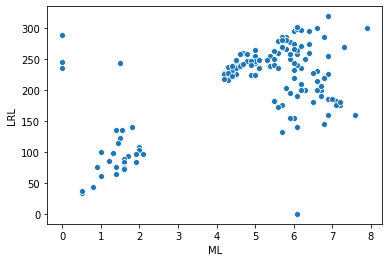

In [2]:
sns.scatterplot(data=df, x="ML", y="LRL")

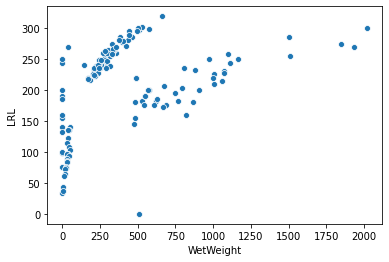

In [3]:
sns.scatterplot(data=df, x="WetWeight", y="LRL")

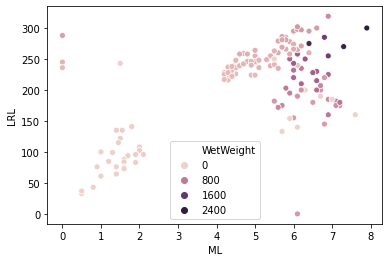

In [4]:
sns.scatterplot(data=df, x="ML", y="LRL", hue="WetWeight")

In [5]:
# specify the number of clusters / centroids
C = 3


In [6]:
# using sk-learn
from sklearn.cluster import KMeans
import numpy as np

df_matrix = df.values

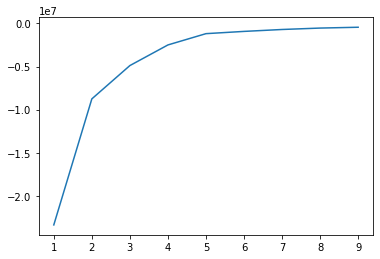

In [12]:
cluster_sizes = list()
cluster_scores = list()

#score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

for K in range(1,10):
    cluster_sizes.append(K)
    KMeans(n_clusters=K)
    score = KMeans(n_clusters=K).fit(df).score(df)
    cluster_scores.append(score)

sns.lineplot(x=cluster_sizes, y=cluster_scores)
